In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [64]:
df = pd.read_csv(r'D:\My ML Projects\SMS Spam\spam.csv', encoding='latin-1')

In [65]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1.Data Cleaning

In [67]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [68]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
df = df.rename(columns = {'v1':'target','v2':'text'})

In [70]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [71]:
# Check missing values
df.isnull().sum().max()

0

In [72]:
# Check duplicated values
df.duplicated().sum()

403

In [73]:
df = df.drop_duplicates(keep='first')

In [74]:
df.shape

(5169, 2)

In [75]:
df.duplicated().sum()

0

# 2.EDA

In [76]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

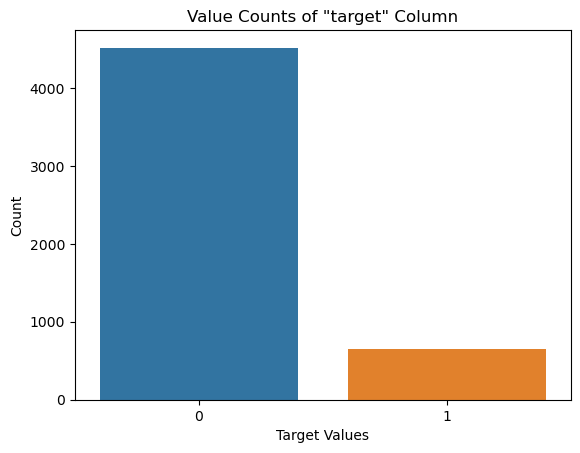

In [78]:
sns.countplot(data=df, x='target')

# Add labels and title
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Value Counts of "target" Column')

# Show the plot
plt.show()

In [79]:
#Data is Imbalanced

In [80]:
import nltk

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
df['num_characters'] = df['text'].apply(len)

In [83]:
#Number Of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [84]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [85]:
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [86]:
df.head()


,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
df[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [89]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


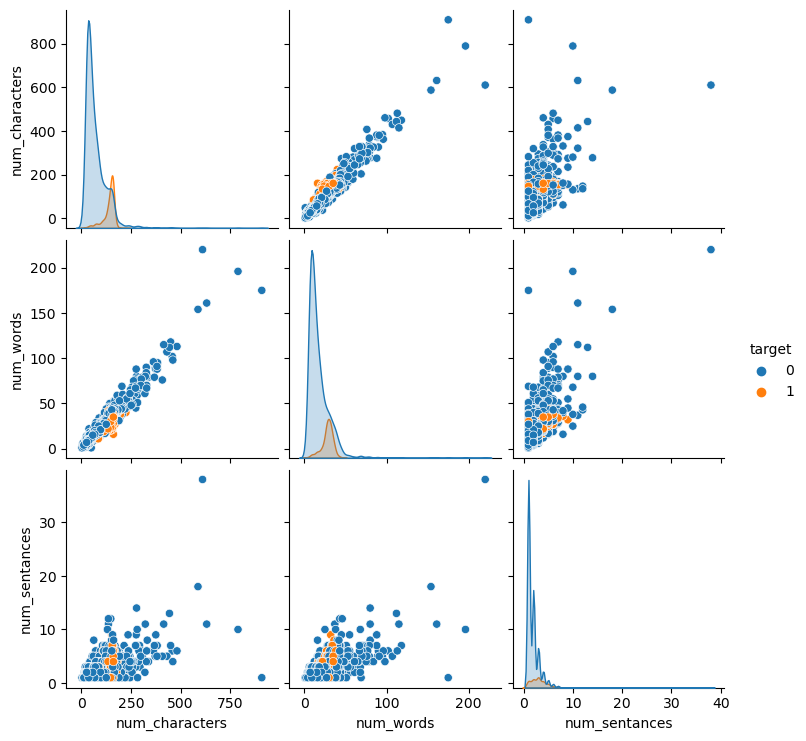

In [90]:
sns.pairplot(df, hue='target')

In [91]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


In [92]:
correlation_matrix

,target,num_characters,num_words,num_sentances
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentances,0.263939,0.624139,0.679971,1.000000


<Axes: >

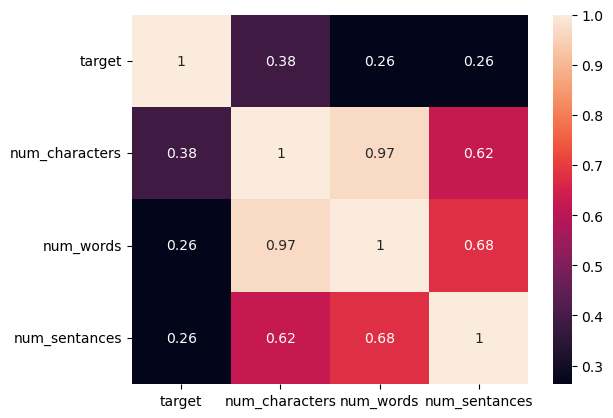

In [93]:
sns.heatmap(correlation_matrix, annot=True)

# 3.Data Preprocessing
   * Lower case
   * Tokenization
   * Removing special characters
   * Removing stop words and punctuation
   * Steming

In [94]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    result = []
    for word in text:
        # Check if the word is alphanumeric and not in stopwords and not in string.punctuation
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            result.append(word)
    
    stemmer = PorterStemmer()
    result = [stemmer.stem(word) for word in result]

    return " ".join(result)


In [95]:
df['transformed_text'] = df['text'].apply(transform_text)

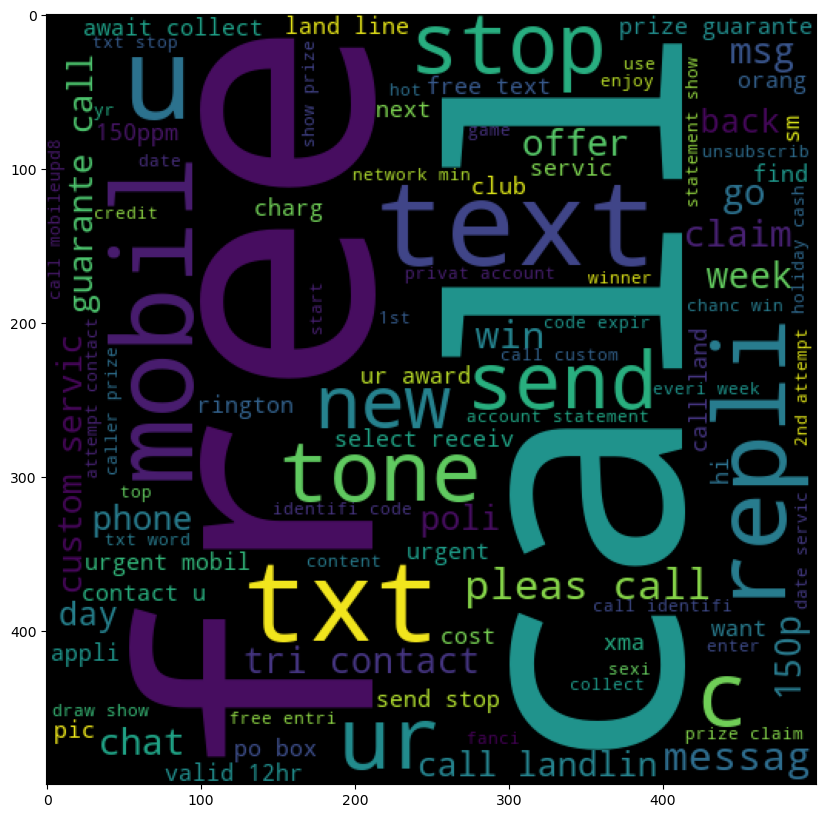

In [96]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 10))
plt.imshow(spam_wc)

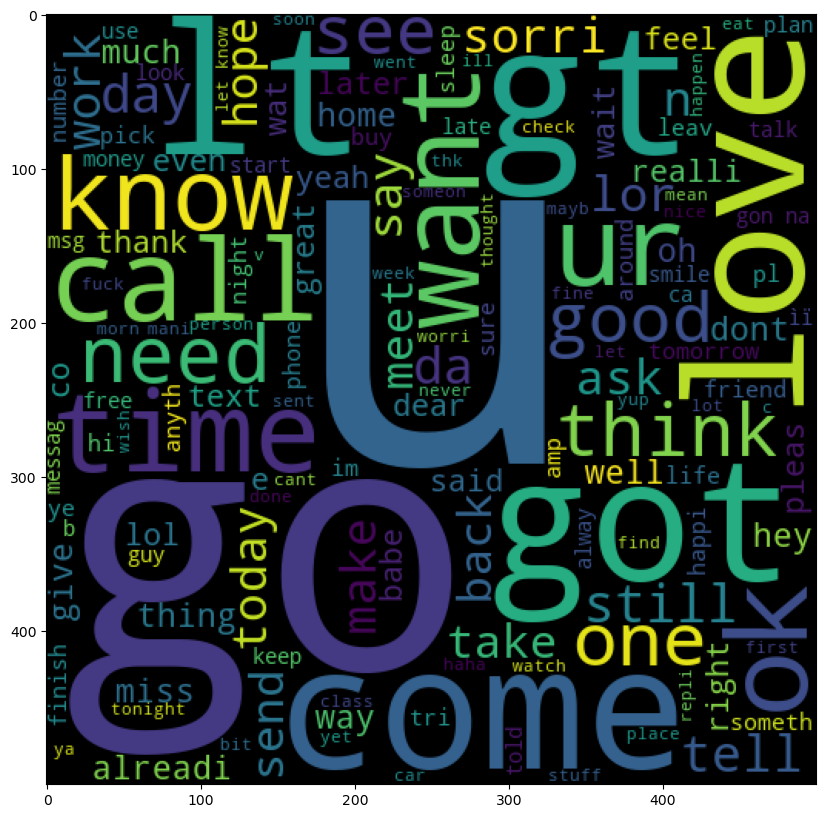

In [97]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 10))
plt.imshow(spam_wc)

# 4.Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer()

In [99]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [100]:
X.shape

(5169, 6708)

In [101]:
y= df['target']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred45 = rf.predict(X_test)  # Use predict method instead of fit for making predictions
print("Accuracy:", accuracy_score(y_test, y_pred45))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred45))
print("Precision Score:", precision_score(y_test, y_pred45))


Accuracy: 0.9729206963249516
Confusion Matrix:
 [[896   0]
 [ 28 110]]
Precision Score: 1.0


In [106]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

mnb= MultinomialNB()
mnb.fit(X_train, y_train)

y_pred46 = mnb.predict(X_test)  # Use predict method instead of fit for making predictions
print("Accuracy:", accuracy_score(y_test, y_pred46))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred46))
print("Precision Score:", precision_score(y_test, y_pred46))

Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision Score: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Create a list of tuples, each containing the model name and the corresponding classifier instance
models = [
    ("GaussianNB", GaussianNB()),
    ("MultinomialNB", MultinomialNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LogisticRegression", LogisticRegression()),
    ("SVC", SVC()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("BaggingClassifier", BaggingClassifier()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("XGBClassifier", XGBClassifier())
]

# Iterate over the models and train/evaluate each one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Precision:", precision)

In [ ]:
# Create an empty list to store results
results_list = []

# Iterate over the models and train/evaluate each one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Append results to the list
    results_list.append({
        "Model": name,
        "Accuracy": acc,
        "Confusion Matrix": confusion_mat,
        "Precision": precision
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(results_list)

In [ ]:
results_df

In [ ]:
results_df=results_df.drop(columns=['Confusion Matrix'])

In [ ]:
sorted_results_df = results_df.sort_values(by='Precision', ascending=False, ignore_index=True)
print(sorted_results_df)

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('SVC', SVC())
]

# Create a StackingClassifier with a final estimator
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(rf, open('model.pkl' , 'wb'))